# 1. Parallel data processing


## 1.1 Configuración y carga de datos en PySpark

###Paso 1: Configuración del entorno de PySpark en Colab

In [5]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

!tar xf spark-3.5.0-bin-hadoop3.tgz

#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
19 packages can be upgraded. Run 'apt list --upgradable' to see them.


'/content/spark-3.5.0-bin-hadoop3'

## Esto no, porque se corrio en ambiente local

###Paso 2: Crear la sesión de trabajo de Spark

In [1]:
#Verificar la funcionalidad de Pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/11/06 17:50:59 WARN Utils: Your hostname, Nitro-Andre resolves to a loopback address: 127.0.1.1; using 172.22.45.199 instead (on interface eth0)
23/11/06 17:50:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/06 17:51:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## 1.2 Procesamiento en Nodos

###Paso 3: Crear una RDD para poder paralelizar (Compute Nodes, Worker Nodes)

- Las RDD se pueden crear para diferentes propósitos, como en el uso de listas o arreglos.
- Para fines ilustrativos en este ejemplo se crea una RDD para generar una lista de enteros (integers) que van de 0 a 99.


In [2]:
rdd = sc.parallelize(range(100))
rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

- Posteriomente se pueden contar todos los elementos de la lista
  * Cuando se ejecuta la función "count" internamente se crean diferentes tareas en spark que se ejecutan de manera paralela en los clusters (nodos).

In [3]:
rdd.count()

100

- Se pueden mostrar los primeros 10 elementos de la lista

In [4]:
rdd.take(30)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

- Se puede copiar el contenido completo de la lista al drive (nodo) local de Apache Spark.
  * NOTA: Se hace con RDD's pequeños, de lo contrario se puede agotar la memoria local.

In [5]:
rdd.collect()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

# 2. Cálculo de la Covarianza y la Correlación

##2.1 Cálculo de la covarianza y correlación

###Paso 3: Cálculo de la covarianza "manualmente" (sin uso de funciones internas predefinidas)

- Se generan datos que aleatorios para la sesión de trabajo

In [6]:
import random
rddX = sc.parallelize(random.sample(list(range(100)),100))
rddY = sc.parallelize(random.sample(list(range(100)),100))
rddX

ParallelCollectionRDD[5] at readRDDFromFile at PythonRDD.scala:287

In [7]:
rddZ = random.sample(list(range(100)),100)
rddZ

[56,
 25,
 91,
 28,
 38,
 0,
 15,
 5,
 37,
 40,
 79,
 54,
 71,
 82,
 32,
 52,
 65,
 36,
 31,
 3,
 72,
 87,
 48,
 69,
 45,
 29,
 77,
 6,
 97,
 49,
 76,
 18,
 66,
 35,
 4,
 83,
 11,
 20,
 86,
 62,
 88,
 96,
 23,
 59,
 33,
 98,
 14,
 22,
 24,
 74,
 93,
 53,
 61,
 30,
 80,
 16,
 2,
 19,
 99,
 46,
 81,
 73,
 44,
 41,
 95,
 92,
 1,
 13,
 55,
 60,
 68,
 57,
 90,
 47,
 43,
 17,
 78,
 7,
 34,
 12,
 50,
 70,
 75,
 89,
 67,
 42,
 8,
 64,
 27,
 63,
 39,
 9,
 10,
 51,
 26,
 58,
 84,
 94,
 85,
 21]

- Se calcúla la media de cada uno de estos grupos de datos

In [8]:
meanX = rddX.sum()/float(rddX.count())
meanY = rddY.sum()/float(rddY.count())
print (meanX)
print (meanY)

49.5
49.5


- Ahora es posible calcular la covarianza "manualmente"

Zips this RDD with another one, returning key-value pairs with the
first element in each RDD second element in each RDD, etc. Assumes
that the two RDDs have the same number of partitions and the same
number of elements in each partition (e.g. one was made through
a map on the other).

In [9]:
rddXY = rddX.zip(rddY)
rddXY.collect()


[(20, 25),
 (29, 65),
 (98, 86),
 (34, 98),
 (97, 27),
 (95, 48),
 (48, 93),
 (27, 69),
 (62, 55),
 (12, 95),
 (23, 62),
 (22, 39),
 (46, 18),
 (30, 4),
 (81, 85),
 (55, 38),
 (89, 87),
 (36, 7),
 (25, 21),
 (59, 14),
 (21, 41),
 (14, 92),
 (4, 50),
 (63, 96),
 (6, 2),
 (33, 3),
 (94, 30),
 (11, 58),
 (75, 44),
 (88, 60),
 (26, 45),
 (32, 11),
 (80, 64),
 (70, 68),
 (31, 29),
 (1, 75),
 (52, 76),
 (61, 12),
 (83, 91),
 (9, 88),
 (0, 49),
 (49, 20),
 (47, 52),
 (53, 51),
 (54, 9),
 (37, 22),
 (35, 16),
 (68, 33),
 (41, 19),
 (91, 54),
 (56, 99),
 (73, 57),
 (18, 81),
 (3, 47),
 (66, 23),
 (5, 43),
 (76, 0),
 (71, 5),
 (84, 61),
 (90, 35),
 (16, 40),
 (13, 53),
 (44, 6),
 (60, 67),
 (38, 94),
 (96, 63),
 (64, 84),
 (39, 15),
 (58, 72),
 (93, 80),
 (51, 26),
 (86, 10),
 (40, 34),
 (69, 97),
 (74, 79),
 (42, 70),
 (10, 36),
 (65, 32),
 (82, 77),
 (45, 31),
 (92, 74),
 (43, 56),
 (67, 8),
 (2, 28),
 (57, 59),
 (72, 13),
 (79, 66),
 (99, 17),
 (87, 90),
 (77, 83),
 (28, 78),
 (15, 37),
 (19,

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.
${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$

$cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{N}$

map: Return a new RDD by applying a function to each element of this RDD. Examples
rdd = sc.parallelize(["b", "a", "c"])

sorted(rdd.map(lambda x: (x, 1)).collect())

[('a', 1), ('b', 1), ('c', 1)]

In [10]:
covXY = rddXY.map(lambda x_y : (x_y[0]-meanX)*(x_y[1]-meanY)).sum()/rddXY.count()
covXY

90.38

###Paso 4: Cálculo de la correlación "manualmente" (sin uso de funciones internas predefinidas)

- Para calcular la correlación primero se estiman las desviaciones estandar.
$\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}$

In [11]:
from math import sqrt
n = rddXY.count()
sdX = sqrt(rddX.map(lambda x : pow(x-meanX,2)).sum()/n)
sdY = sqrt(rddY.map(lambda x : pow(x-meanY,2)).sum()/n)
print (sdX)
print (sdY)

28.86607004772212
28.86607004772212


- Ahora es posible calcular la correlación

In [12]:
corrXY = covXY / (sdX * sdY)
corrXY

0.10846684668466847

###Paso 5: Cálculo de la correlación usando la función corr()

In [13]:
from pyspark.mllib.stat import Statistics
data_corr1 = Statistics.corr(rddXY)
print(data_corr1)

[[1.         0.10846685]
 [0.10846685 1.        ]]


23/11/06 17:51:39 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


###Paso 6: Ejemplo adicional del cálculo de la correlación usando la función corr(). Una mejor visualización en Pandas y Spark

- Se generan datos que aleatorios para la sesión de trabajo

In [15]:
import random
column1 = sc.parallelize(range(100), numSlices=10)
column2 = sc.parallelize(range(100,200), numSlices=10)
column3 = sc.parallelize(list(reversed(range(100))), numSlices=10)
column4 = sc.parallelize(random.sample(range(100),100), numSlices=10)

# Asegurándonos de que todos los RDDs tienen el mismo número de particiones y elementos por partición
column1 = column1.repartition(10)
column2 = column2.repartition(10)
column3 = column3.repartition(10)
column4 = column4.repartition(10)

data = column1.zip(column2).zip(column3).zip(column4).map(lambda a_b_c_d : (a_b_c_d[0][0][0], a_b_c_d[0][0][1], a_b_c_d[0][1], a_b_c_d[1]) )
data.take(20)


[(60, 160, 39, 52),
 (61, 161, 38, 13),
 (62, 162, 37, 54),
 (63, 163, 36, 2),
 (64, 164, 35, 92),
 (65, 165, 34, 3),
 (66, 166, 33, 42),
 (67, 167, 32, 62),
 (68, 168, 31, 85),
 (69, 169, 30, 73),
 (70, 170, 29, 50),
 (71, 171, 28, 72),
 (72, 172, 27, 56),
 (73, 173, 26, 77),
 (74, 174, 25, 68),
 (75, 175, 24, 0),
 (76, 176, 23, 98),
 (77, 177, 22, 80),
 (78, 178, 21, 40),
 (79, 179, 20, 19)]

- Se calcúla la correlación usando la función corr

In [16]:
from pyspark.mllib.stat import Statistics
data_corr = Statistics.corr(data)
print(data_corr)

[[ 1.          1.         -1.          0.10275428]
 [ 1.          1.         -1.          0.10275428]
 [-1.         -1.          1.         -0.10275428]
 [ 0.10275428  0.10275428 -0.10275428  1.        ]]


###Paso 7: Visualizar los datos con un Spark DataFrame
- Usando pandas

In [17]:
import pandas as pd
variables = ['var1', 'var2', 'var3', 'var4']
df_pandas = pd.DataFrame(data_corr,index=variables,columns=variables)
print(df_pandas)

          var1      var2      var3      var4
var1  1.000000  1.000000 -1.000000  0.102754
var2  1.000000  1.000000 -1.000000  0.102754
var3 -1.000000 -1.000000  1.000000 -0.102754
var4  0.102754  0.102754 -0.102754  1.000000


In [18]:
df_spark = spark.createDataFrame(df_pandas)
df_spark.show()

+-------------------+-------------------+--------------------+--------------------+
|               var1|               var2|                var3|                var4|
+-------------------+-------------------+--------------------+--------------------+
|                1.0|                1.0|                -1.0| 0.10275427542754276|
|                1.0|                1.0|                -1.0| 0.10275427542754276|
|               -1.0|               -1.0|                 1.0|-0.10275427542754276|
|0.10275427542754276|0.10275427542754276|-0.10275427542754276|                 1.0|
+-------------------+-------------------+--------------------+--------------------+



# Parte 2. Parallel Matrix multiplication

In [20]:
#!/usr/bin/env python3
# +======================================================================+
# |                                                                      |
# | File: matrix_multiply.py                                             |
# | Author: Jim Kelly | N9763686                                         |
# | Purposes: This script has been created for the purposes of an        |
# |      oral presentation for CAB401 High Performance and Parallel      |
# |      Computing, Semester 2, 2021, at the Queensland University of    |
# |      Technology (QUT). The script demonstrates a basic comparison    |
# |      between the best sequential matrix multiplication with Python   |
# |      and the parallelised implementation of matrix multiplication    |
# |      using Apache-Spark's BlockMatrix.                               |
# | Description: To change the matrix dimensions replace the value for   |
# |      'N'. The script will first calculate the sequential values of   |
# |      of two matrices populated with number N randomised values. The  |
# |      script will then compute the same operation using Spark's       |
# |      parallelisation methods, i.e. BlockMatrix.multiply().           |
# +======================================================================+
# | References:                                                          |
# | as_block_matrix: Taken from Stack Overflow,                          |
# |     How to Multiply Two Numpy Matrices in PySpark?,                  |
# | 'https://stackoverflow.com/questions/42889965/multiply-two-numpy-    |
# |     matrices-in-pyspark'                                             |
# | indexrowmatrix_to_array: Taken from Stack Overflow,                  |
# |     How to Convert a DistributedMatrix to Scipy Sparse or            |
# |         Numpy Array,                                                 |
# | 'https://stackoverflow.com/questions/54083978/convert-a-             |
# |     distributedmatrix-to-scipy-sparse-or-numpy-array'                |
# +======================================================================+
# |                           Imports                                    |
# +======================================================================+

import random
from timeit import default_timer as timer
from scipy.sparse import lil_matrix
from pyspark.sql import SparkSession
from pyspark.mllib.linalg.distributed import *

# +======================================================================+
# |                         Start of File                                |
# +======================================================================+



In [21]:
# Create and start Spark session
app_name = 'PySpark Matrix Multiplication Example'
master = 'local'
spark = SparkSession.builder.appName(app_name).master(master).getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

# Define global variables
N = 1500 # Matrix dimensions

# Method to create a populated matrix of size N * N, with potential
# values ranging from (max_value - 1) through to max_value.
def create_matrix(size, max_value):
    return [[random.randint((max_value * -1), max_value) for i in range(size)] \
            for j in range(size)]

# Method to create a matrix populated with 0's of size N * N.
def create_empty_matrix(size):
    return [[0 for i in range(size)] for j in range(size)]

# Method to multiply two matrices of the same dimensions, i.e. N * N.
def matrix_multiply(A, B, C, size):
    for i in range(size):
        for j in range(size):
            total = 0 # Initialise total to 0
            for k in range(size):
                total += A[i][k] * B[k][j] # Perform matrix multiply
            C[i][j] = total

    # Return the result of the matrix multiplication
    return C

# Initialise matrices
A = create_matrix(N, 500)
B = create_matrix(N, 500)
C = create_empty_matrix(N)

print('Performing standard matrix multiplication')

# Perform and time matrix multiplication
start = timer() #
C = matrix_multiply(A, B, C, N) #
end = timer() #

# Print the execution time
print('Best Sequential execution time (seconds):', end - start)



Performing standard matrix multiplication
Best Sequential execution time (seconds): 478.389513974


# Parallel version

In [22]:
# Method to convert a Resilient Distributed Dataset (RDD) to a BlockMatrix object
def as_block_matrix(rdd, rows, columns):
    return IndexedRowMatrix(
        rdd.zipWithIndex().map(lambda i: IndexedRow(i[1], i[0]))
    ).toBlockMatrix(rows, columns)

# Method to convert an indexed row matrix to a local array using Scipy 'lil_matrix'
def indexedrowmatrix_to_array(matrix):
    # Create an empty array of the same dimensions as the matrix
    result = lil_matrix((matrix.numRows(), matrix.numCols()))

    # Iterate through each row and set values in the empty array
    for indexed_row in matrix.rows.collect():
        result[indexed_row.index] = indexed_row.vector

    # Return the local array
    return result


# Convert arrays to RDDs
A_rdd = spark.sparkContext.parallelize(A)
B_rdd = spark.sparkContext.parallelize(B)

# Perform and time matrix multiplication
start = timer() #
C_matrix = as_block_matrix(A_rdd, N, N).multiply(as_block_matrix(B_rdd, N, N)) #
end = timer() #

# Print the execution time
print('Apache Spark execution time (seconds):', end - start)

# Convert the resulting BlockMatrix to a local array
result = indexedrowmatrix_to_array(C_matrix.toIndexedRowMatrix())

# Print resulting matrix if it's not excessively large
if N <= 4:
    print("Printing sequential result matrix.")
    for row in C:
        print(row)
    print("Printing Spark result matrix")
    print(result)

# +======================================================================+
# |                           End of File                                |
# +======================================================================+

Apache Spark execution time (seconds): 16.808138985999904


## Importar bibliotecas y configurar el entorno de Spark

In [4]:
import matplotlib.pyplot as plt
from pyspark.mllib.linalg.distributed import IndexedRowMatrix
from scipy.sparse import lil_matrix
from timeit import default_timer as timer
import numpy as np
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Matrix Multiplication Benchmark").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

your 131072x1 screen size is bogus. expect trouble
23/11/07 17:17:39 WARN Utils: Your hostname, Nitro-Andre resolves to a loopback address: 127.0.1.1; using 172.22.45.199 instead (on interface eth0)
23/11/07 17:17:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/07 17:17:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Definir funciones auxiliares y globales

In [5]:
import random

# Define a range of N values to test
N_values = range(100, 2001, 100)  # Example: from 100 to 2000 with step 100

# Initialize lists to store execution times for each N
sequential_times = []
parallel_times = []

# Function to create a populated matrix
def create_matrix(size, max_value):
    return [[random.randint((max_value * -1), max_value) for _ in range(size)] for _ in range(size)]

# Function to perform sequential matrix multiplication
def sequential_matrix_multiply(A, B):
    size = len(A)
    C = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B[k][j]
    return C

## Realizar pruebas de multiplicación de matrices y registrar tiempos

In [8]:
# Loop over each N value, perform matrix multiplication, and record execution times
for N in N_values:
    # Create matrices A and B
    A = create_matrix(N, 500)
    B = create_matrix(N, 500)

    # Sequential matrix multiplication
    start = timer()
    C = sequential_matrix_multiply(A, B)
    end = timer()
    sequential_times.append(end - start)

    # Parallel matrix multiplication
    A_rdd = spark.sparkContext.parallelize(A)
    B_rdd = spark.sparkContext.parallelize(B)
    start = timer()
    C_matrix = IndexedRowMatrix(A_rdd.zipWithIndex().map(lambda xi: (xi[1], xi[0]))).toBlockMatrix().multiply(IndexedRowMatrix(B_rdd.zipWithIndex().map(lambda xi: (xi[1], xi[0]))).toBlockMatrix())
    end = timer()
    parallel_times.append(end - start)
    print("N = {} completed.".format(N))
    print("Sequential execution time (seconds): {}".format(sequential_times[-1]))
    print("Parallel execution time (seconds): {}".format(parallel_times[-1]))

N = 100 completed.
Sequential execution time (seconds): 0.1298335029998725
Parallel execution time (seconds): 2.6870687460000227


N = 200 completed.
Sequential execution time (seconds): 1.1011958190001678
Parallel execution time (seconds): 2.7066650469998876
N = 300 completed.
Sequential execution time (seconds): 3.54711240000006
Parallel execution time (seconds): 2.7079124919998776


N = 400 completed.
Sequential execution time (seconds): 8.714890259999947
Parallel execution time (seconds): 3.632566463999865


N = 500 completed.
Sequential execution time (seconds): 18.393418653000026
Parallel execution time (seconds): 6.459191979000025


N = 600 completed.
Sequential execution time (seconds): 35.962940419999995
Parallel execution time (seconds): 4.044513697000184


N = 700 completed.
Sequential execution time (seconds): 59.0339240039998
Parallel execution time (seconds): 4.290410566999981


N = 800 completed.
Sequential execution time (seconds): 82.18997265300004
Parallel execution time (seconds): 6.441696933000003


N = 900 completed.
Sequential execution time (seconds): 127.27540971300004
Parallel execution time (seconds): 5.459808568000199


N = 1000 completed.
Sequential execution time (seconds): 170.14140754699997
Parallel execution time (seconds): 5.057952443999966


N = 1100 completed.
Sequential execution time (seconds): 211.1887888020001
Parallel execution time (seconds): 8.326170647999788


N = 1200 completed.
Sequential execution time (seconds): 296.20475079200014
Parallel execution time (seconds): 6.997296249999636


N = 1300 completed.
Sequential execution time (seconds): 409.09658571399996
Parallel execution time (seconds): 9.845544064000023


N = 1400 completed.
Sequential execution time (seconds): 460.68594484999994
Parallel execution time (seconds): 7.9177809480002


N = 1500 completed.
Sequential execution time (seconds): 582.266550159
Parallel execution time (seconds): 8.48632118200021


N = 1600 completed.
Sequential execution time (seconds): 702.3909716779999
Parallel execution time (seconds): 9.220101730999886


N = 1700 completed.
Sequential execution time (seconds): 899.0555198920001
Parallel execution time (seconds): 10.020584799999597


N = 1800 completed.
Sequential execution time (seconds): 1037.1540791810003
Parallel execution time (seconds): 10.575425760000144


N = 1900 completed.
Sequential execution time (seconds): 1075.5356089590005
Parallel execution time (seconds): 9.004407160000483


N = 2000 completed.
Sequential execution time (seconds): 1338.2473968329996
Parallel execution time (seconds): 8.985066985998856


## Graficar resultados y buscar puntos de interés

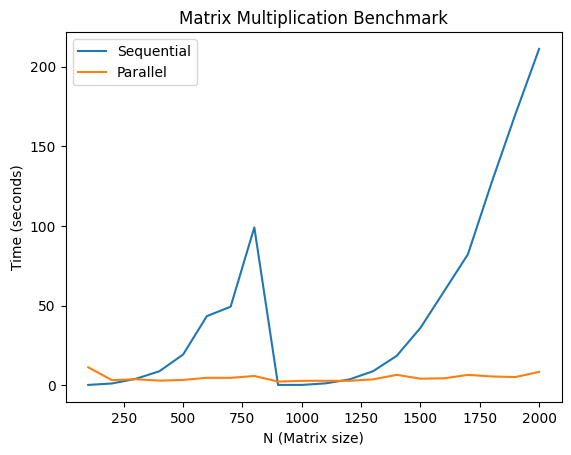

Intersection at N=100
Parallel time reaches 5 minutes at N=None


In [12]:
import matplotlib.pyplot as plt

# Plotting only up to the minimum length of the three lists
min_length = min(len(N_values), len(sequential_times), len(parallel_times))

# Plot the curves using the minimum length
plt.plot(N_values[:min_length], sequential_times[:min_length], label='Sequential')
plt.plot(N_values[:min_length], parallel_times[:min_length], label='Parallel')
plt.xlabel('N (Matrix size)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Matrix Multiplication Benchmark')
plt.show()

# Find intersection and five-minute mark using the minimum length
# This will only consider the range of N where both sequential and parallel times are available
if min_length > 0:
    pairs = list(zip(N_values, sequential_times, parallel_times))[:min_length]
    cross_point = next((N for N, t_seq, t_par in pairs if t_seq <= t_par), None)
    five_minutes_N = next((N for N, _, t_par in pairs if t_par >= 300), None)  # Corrected unpacking here
else:
    cross_point = None
    five_minutes_N = None

print(f"Intersection at N={cross_point}")
print(f"Parallel time reaches 5 minutes at N={five_minutes_N}")

## N= None ya que se hizo todo el dataset

## Estimación de funciones de tiempo de ejecución

In [14]:
# import numpy as np

# Ensuring that all arrays are of the same length for polyfit
min_length = min(len(N_values), len(sequential_times), len(parallel_times))
N_values_fit = N_values[:min_length]
sequential_times_fit = sequential_times[:min_length]
parallel_times_fit = parallel_times[:min_length]

# Estimating functions fs and fp for Ts and Tp
sequential_coeffs = np.polyfit(N_values_fit, sequential_times_fit, 2)
parallel_coeffs = np.polyfit(N_values_fit, parallel_times_fit, 2)

# Define the estimated functions using the coefficients
def fs(N, coeffs):
    return coeffs[0] * N**2 + coeffs[1] * N + coeffs[2]

def fp(N, coeffs):
    return coeffs[0] * N**2 + coeffs[1] * N + coeffs[2]

# Example usage
N_example = 1000
predicted_Ts = fs(N_example, sequential_coeffs)
predicted_Tp = fp(N_example, parallel_coeffs)

print(f"Predicted sequential time for N={N_example}: {predicted_Ts} seconds")
print(f"Predicted parallel time for N={N_example}: {predicted_Tp} seconds")

Predicted sequential time for N=1000: 11.999033883195409 seconds
Predicted parallel time for N=1000: 3.1754671103481167 seconds


 ## Es posible estimar la función fs y fp, tal que Ts = fs(N), y Tp = fp(N),pero se requiere una combinación de análisis empírico y teórico, junto con una comprensión detallada del algoritmo y del entorno de hardware en el que se ejecuta.